# Data Overview

This Jupyter notebook will help us understand and visualize the data we will be working with.

The Data Set includes all the fires greater than 1000 acres that happen in Western United States from 1984 to 2016. All data points contain information on climate, vegetation type, human presence, as well as time period and spatial localisation.

## 1 - Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import scipy.io
import os

## 2 - Exploring the data

### 2.1 All data points

In [2]:
# Import dataset extracted from website
df = pd.read_csv('../data/data_final.csv', index_col=0)
print(df.shape)
df.head(2)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(87478212, 14)


,lat,lon,solar,year,month,prec,tmin,wind,vpd,deltaT,forest,urban,FireName,burnarea
0,48.979169,-123.0625,44.11,1984,1,152.60,2.29,1.89,1.74,5.000000,0.187001,0.215967,NaN,0.0
1,48.979169,-123.0625,68.95,1984,2,120.27,3.86,2.08,2.28,5.200001,0.187001,0.215967,NaN,0.0


In [3]:
df.info()
#All types seem to be correct and non NULL values encountered

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87478212 entries, 0 to 87478211
Data columns (total 14 columns):
 #   Column    Dtype  
---  ------    -----  
 0   lat       float64
 1   lon       float64
 2   solar     float64
 3   year      int64  
 4   month     int64  
 5   prec      float64
 6   tmin      float64
 7   wind      float64
 8   vpd       float64
 9   deltaT    float64
 10  forest    float64
 11  urban     float64
 12  FireName  object 
 13  burnarea  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 9.8+ GB


In [18]:
BBox = (df.lon.min(), df.lon.max(),df.lat.min(), df.lat.max())
BBox= (-130, -99, 27, 50)
BBox

(-130, -99, 27, 50)

In [5]:
us_west = plt.imread('../learningfires/us_west_map.png')

In [9]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.lon, df.lat, zorder=1, alpha= 0.2, c=df.burnarea, cmap='hot', s=10)
ax.set_title('Plotting Wildfires in Western US (1984-2017)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_west, zorder=0, extent = BBox, aspect= 'equal')

Error in callback <function flush_figures at 0x7efc967badd0> (for post_execute):


KeyboardInterrupt: 

### 2.2 Only data points with fires

In [10]:
# Import dataset extracted from website
fires = pd.read_csv('../learningfires/fires_final_2.csv', index_col=0)
print(fires.shape)
fires.head(2)

(8718, 17)


,lat,lon,solar,year,month,prec,tmin,wind,vpd,deltaT,ea,es,rh,forest,urban,FireName,burnarea
12451,48.979169,-120.562500,255.62,2006,8,9.05,4.66,2.73,12.37,18.780000,6.30,18.67,0.337440,0.980706,0.0,TATOOSH COMPLEX,18745.74
12823,48.979169,-120.479167,249.53,2002,8,10.33,3.82,2.73,8.74,15.120001,6.21,14.95,0.415385,0.717626,0.0,QUARTZ MT. COMPLEX (QUARTZ MOUNTAIN),1563.12


In [13]:
BBox = (fires.lon.min(), fires.lon.max(),fires.lat.min(), fires.lat.max())
BBox
Bbis = (-125, -100, 30, 50)

(-124.187499999997, -101.562499999816, 31.187502066516696, 48.9791687333257)

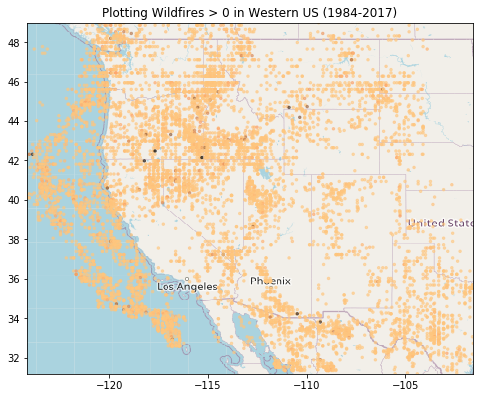

In [12]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(fires.lon, fires.lat, zorder=1, alpha= 0.6, c=fires.burnarea, cmap='copper_r', s=6)
ax.set_title('Plotting Wildfires > 0 in Western US (1984-2017)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_west, zorder=0, extent = BBox, aspect= 'equal')

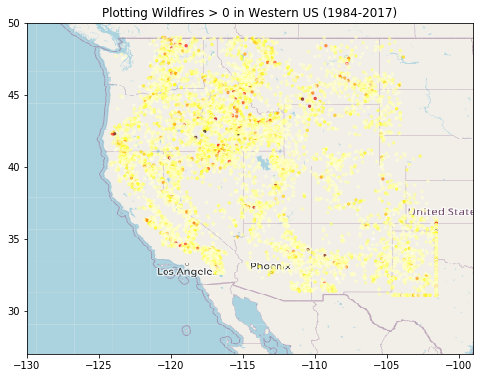

In [30]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(fires.lon, fires.lat, zorder=1, alpha= 0.6, c=np.sqrt(fires.burnarea), cmap='hot_r', s=6)
ax.set_title('Plotting Wildfires > 0 in Western US (1984-2017)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(us_west, zorder=0, extent = BBox, aspect= 'equal')

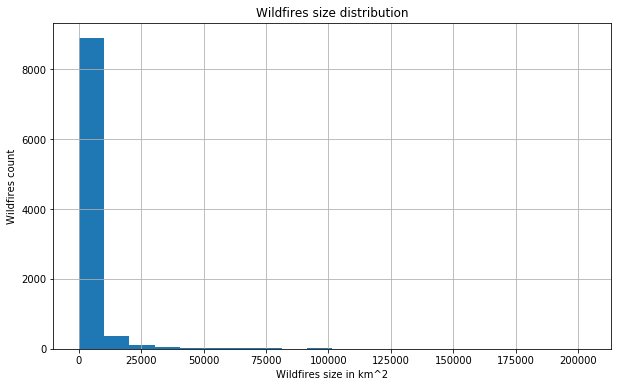

In [38]:
fires.burnarea.hist(bins=20, figsize=(10,6))
plt.title("Wildfires size distribution")
plt.xlabel("Wildfires size in km^2")
plt.ylabel("Wildfires count")
plt.show()

In [39]:
from scipy import stats
def kde_density(x):
    kde = stats.gaussian_kde(x, bw_method='silverman')
    kde_pdf = kde.evaluate(x)
    #f = kde.covariance_factor()
    #bw = f * ys.std()
    return(kde_pdf.astype(np.float32))

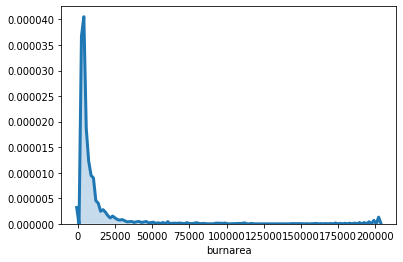

In [40]:
y = fires.burnarea
sns.distplot(y, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})

#### Standardization

In [43]:
X2 = fires.drop(['urban','year','month'], axis=1)
X2.head(2)

,lat,lon,forest,solar,prec,tmin,wind,burnarea,vpd,deltaT
20071,48.979169,-120.645833,0.965783,255.24,9.47,5.41,2.71,1.5480,10.84,15.58
20072,48.979169,-120.645833,0.965783,255.24,9.47,5.41,2.71,2.0376,10.84,15.58


In [44]:
# Standardizing numerical features:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X2_scaled = pd.DataFrame(scaler.fit_transform(X2),columns = X2.columns)

X2_scaled.head(20)

,lat,lon,forest,solar,prec,tmin,wind,burnarea,vpd,deltaT
0,1.0,0.158088,0.965783,0.633840,0.037422,0.404963,0.285714,0.044221,0.179782,0.452391
1,1.0,0.158088,0.965783,0.633840,0.037422,0.404963,0.285714,0.058215,0.179782,0.452391
2,1.0,0.158088,0.965783,0.633840,0.037422,0.404963,0.285714,0.058653,0.179782,0.452391
3,1.0,0.159926,0.995730,0.634472,0.035249,0.396774,0.287523,0.043681,0.195045,0.526026
4,1.0,0.159926,0.995730,0.634472,0.035249,0.396774,0.287523,0.084172,0.195045,0.526026
5,1.0,0.159926,0.995730,0.634472,0.035249,0.396774,0.287523,0.232063,0.195045,0.526026
6,1.0,0.161765,0.980706,0.635103,0.035762,0.386352,0.289331,0.017596,0.210109,0.587812
7,1.0,0.161765,0.980706,0.635103,0.035762,0.386352,0.289331,0.118437,0.210109,0.587812
8,1.0,0.161765,0.980706,0.635103,0.035762,0.386352,0.289331,0.265814,0.210109,0.587812
9,1.0,0.163603,0.925633,0.634206,0.038845,0.378164,0.285714,0.046588,0.173835,0.497249


#### Correlations analysis of numerical features

In [45]:
# Creating a DF to examine the correlation between the numerical features:
numDF = X2_scaled
# Correlation matrix:
numDF.corr()

,lat,lon,forest,solar,prec,tmin,wind,burnarea,vpd,deltaT
lat,1.000000,-0.204014,0.089912,-0.161997,0.009188,-0.151746,-0.257679,-0.005315,-0.222934,0.077659
lon,-0.204014,1.000000,-0.061023,-0.178952,0.279771,-0.217856,0.383424,0.000051,-0.069227,0.106520
forest,0.089912,-0.061023,1.000000,0.052445,0.126620,-0.229333,0.141806,-0.091141,-0.395538,-0.334603
solar,-0.161997,-0.178952,0.052445,1.000000,-0.256237,0.464452,0.045237,0.046804,0.491693,0.148147
prec,0.009188,0.279771,0.126620,-0.256237,1.000000,-0.060678,-0.010563,-0.069227,-0.224919,-0.240346
tmin,-0.151746,-0.217856,-0.229333,0.464452,-0.060678,1.000000,-0.348368,0.034117,0.817047,-0.157107
wind,-0.257679,0.383424,0.141806,0.045237,-0.010563,-0.348368,1.000000,0.030230,-0.250194,-0.053008
burnarea,-0.005315,0.000051,-0.091141,0.046804,-0.069227,0.034117,0.030230,1.000000,0.080055,0.049355
vpd,-0.222934,-0.069227,-0.395538,0.491693,-0.224919,0.817047,-0.250194,0.080055,1.000000,0.300446
deltaT,0.077659,0.106520,-0.334603,0.148147,-0.240346,-0.157107,-0.053008,0.049355,0.300446,1.000000


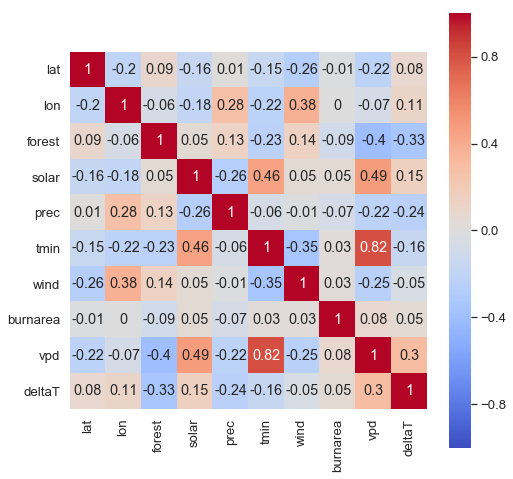

<Figure size 432x288 with 0 Axes>

In [46]:
# Heatmap for easier interpretation:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)

sns.heatmap(numDF.corr().round(2),center=0, vmin=-1, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()
plt.savefig('Heatmap_fires.png')

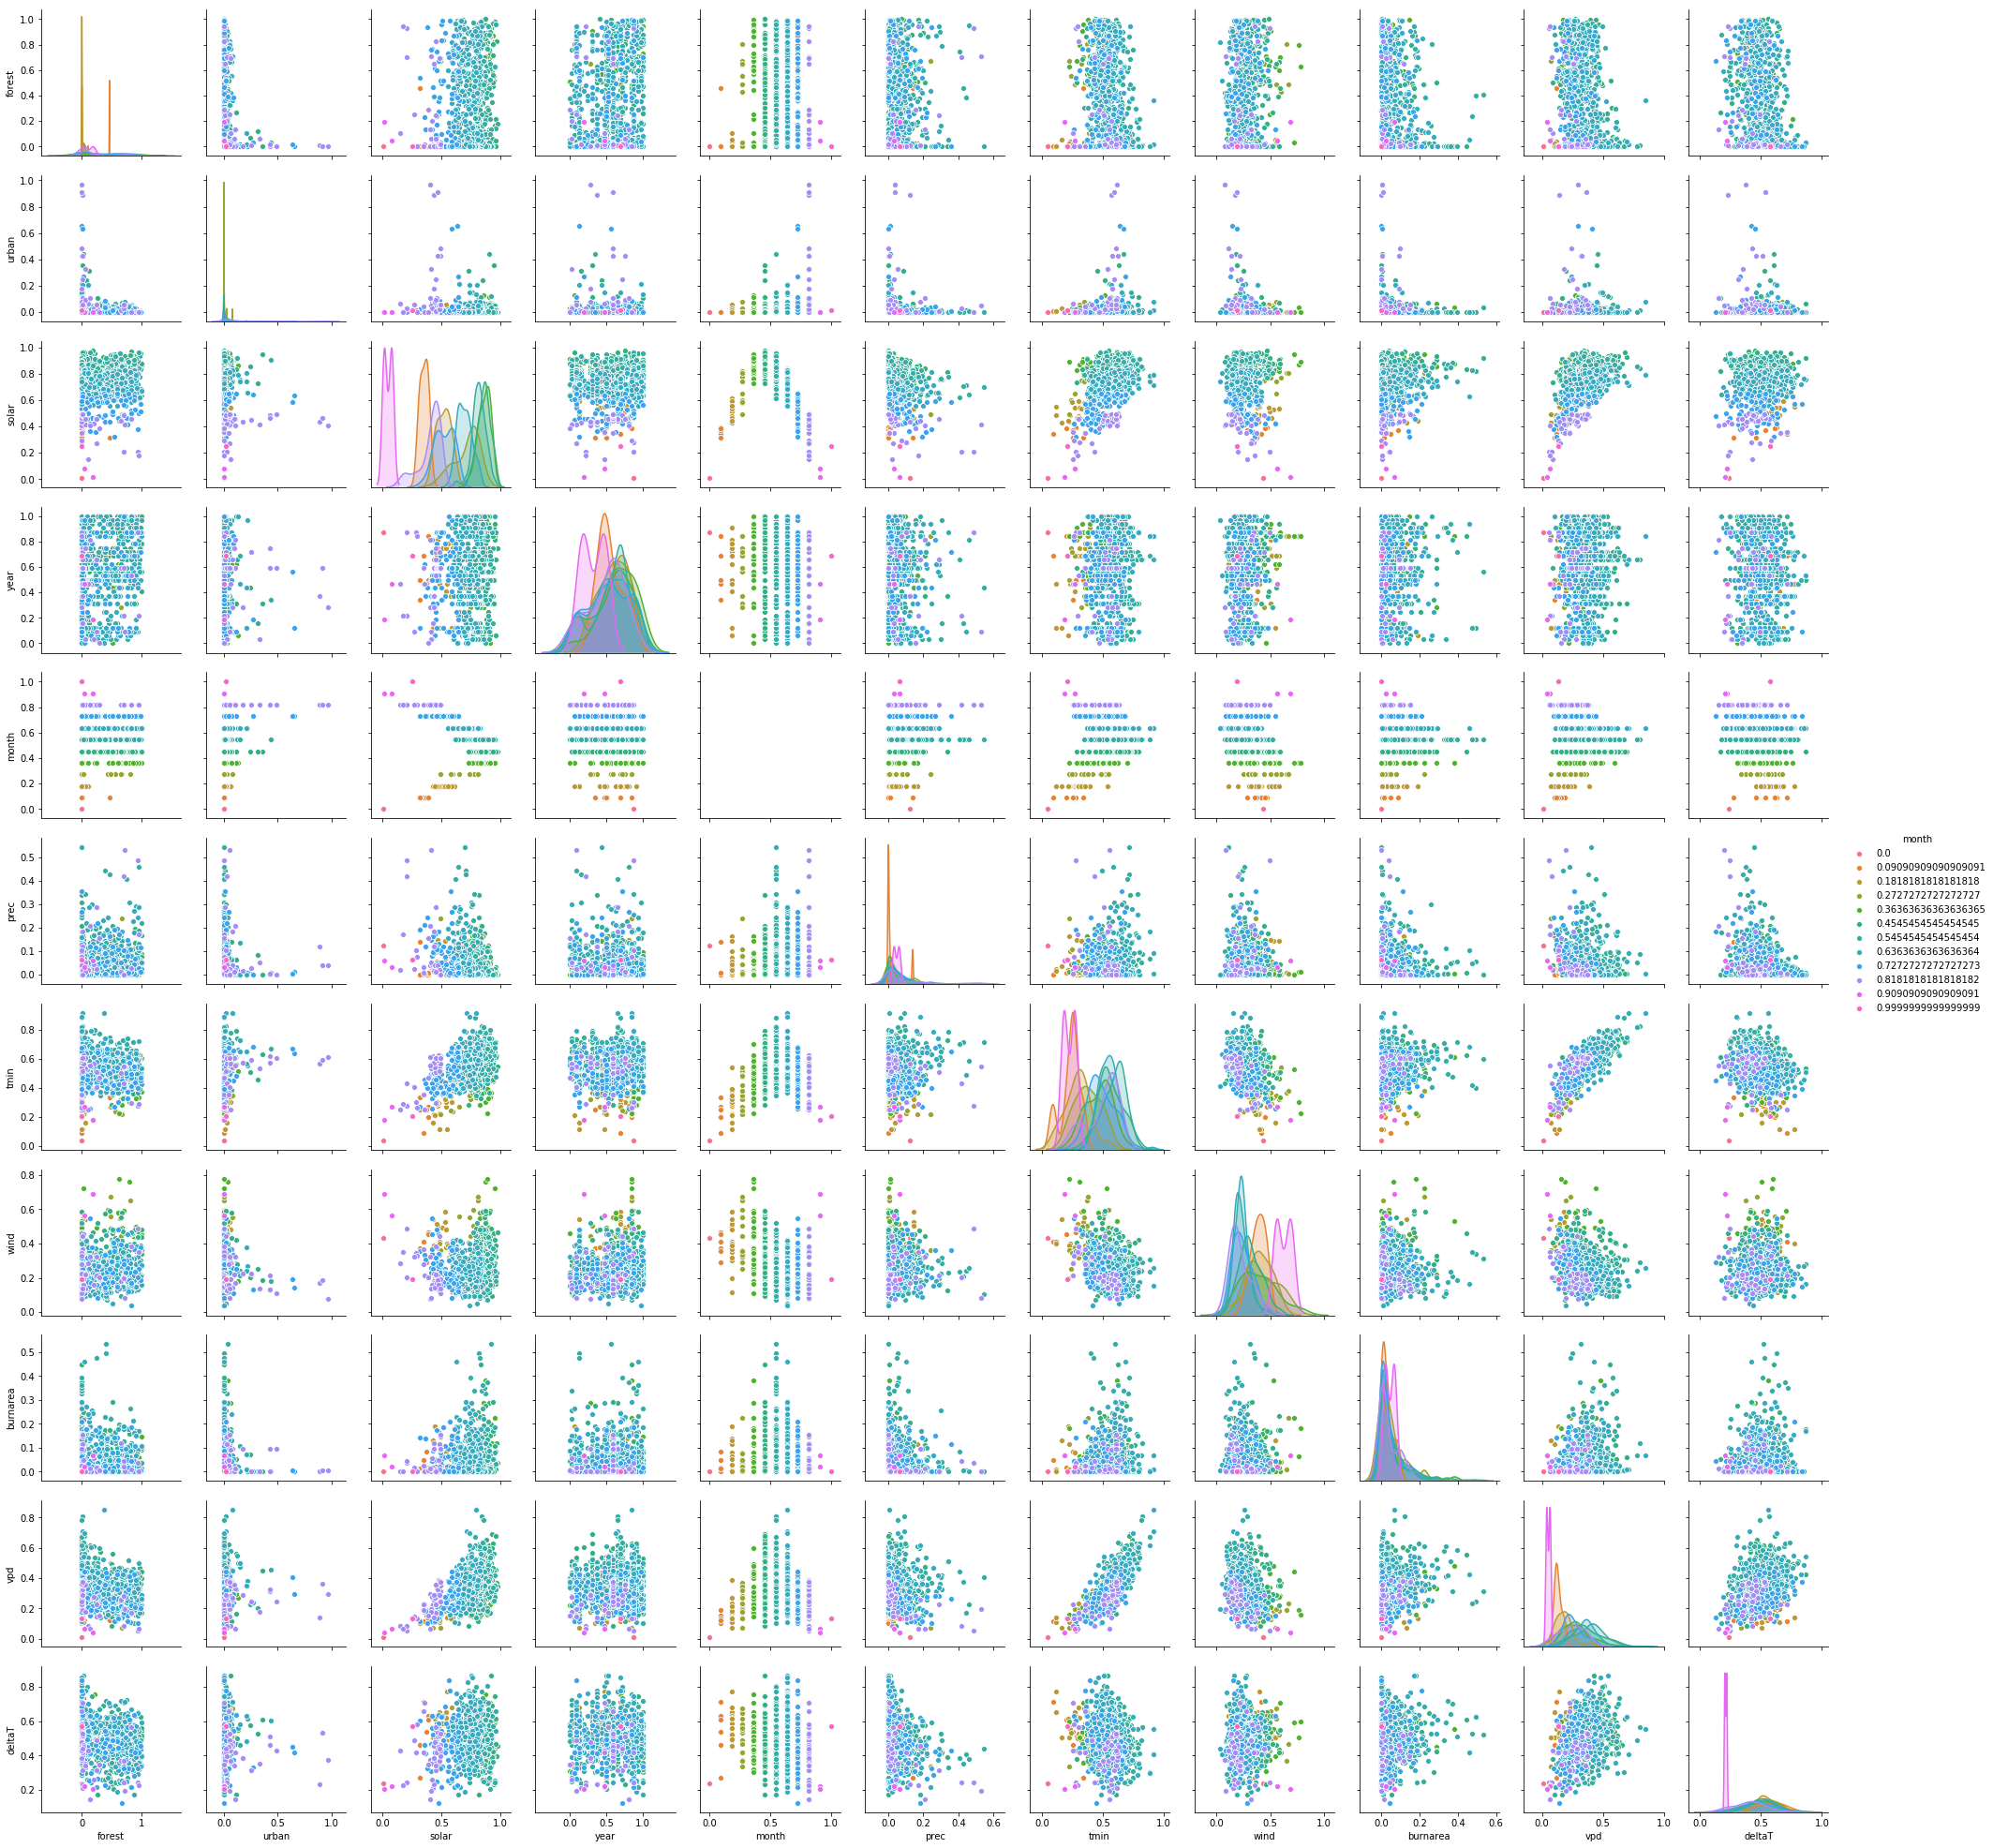

In [10]:
numDF_s = X2_scaled.sample(n=1000, random_state=12)
# Pairplots with different colors corresponding to magnitude:
sns.pairplot(numDF_s, hue='month')
#sns.pairplot(numDF_s)
plt.show()
#plt.savefig('Pairplots_fires.png')


#### Variables effect on fire occurrence

In [41]:
y = fires.burnarea
X = fires.drop(['burnarea'], axis=1)

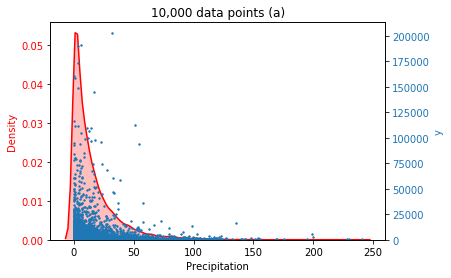

In [42]:
x = np.array(X[['prec']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (a)')
ax1.set_xlabel('Precipitation')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_prec.png')
#ax.show()

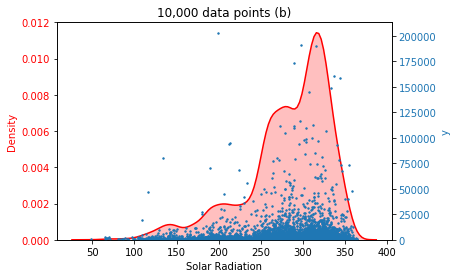

In [43]:
#Solar Radiation
x = np.array(X[['solar']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (b)')
ax1.set_xlabel('Solar Radiation')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_solar.png')

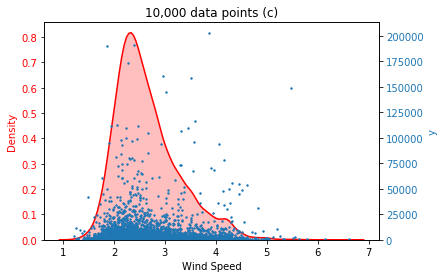

In [44]:
#Wind Speed
x = np.array(X[['wind']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (c)')
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_wind.png')

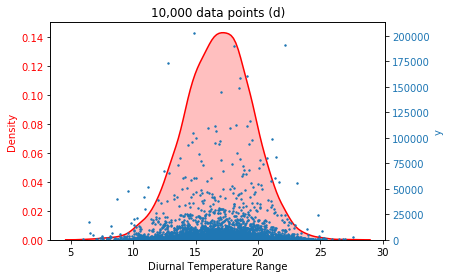

In [45]:
#Temperature Difference
x = np.array(X[['deltaT']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (d)')
ax1.set_xlabel('Diurnal Temperature Range')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_deltaT.png')

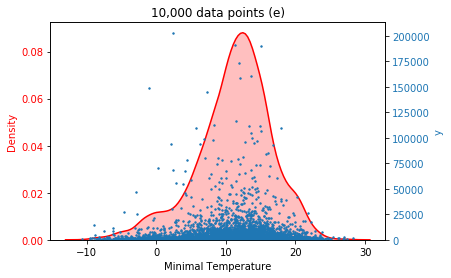

In [46]:
#Temperature min
x = np.array(X[['tmin']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (e)')
ax1.set_xlabel('Minimal Temperature')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_tmin.png')

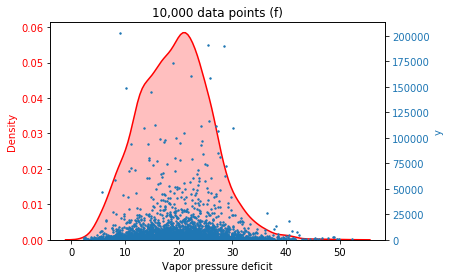

In [47]:
#VPD
x = np.array(X[['vpd']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (f)')
ax1.set_xlabel('Vapor pressure deficit')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_vpd.png')

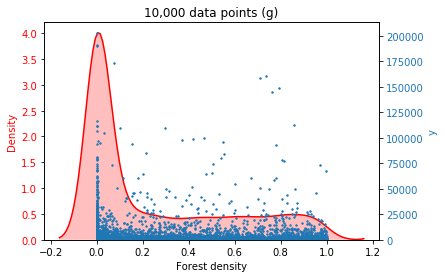

In [48]:
#forest
x = np.array(X[['forest']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (g)')
ax1.set_xlabel('Forest density')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_forest.png')

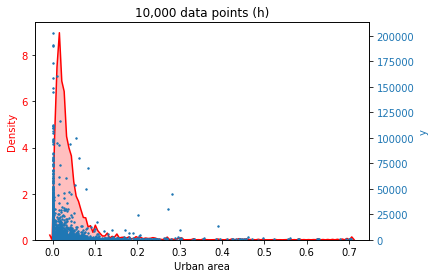

In [49]:
#urban

x = np.array(X[['urban']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('10,000 data points (h)')
ax1.set_xlabel('Urban area')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
fig.savefig('ScatterPlot_urban.png')

#### Variables effect on fire size

In [54]:
m = np.mean(fires.burnarea)

In [55]:
fires_intense = fires[fires.burnarea>m]
y = fires_intense.burnarea
X = fires_intense.drop(['burnarea'], axis=1)

In [56]:
X.shape

(1845, 13)

(20, 213057.85407715905)

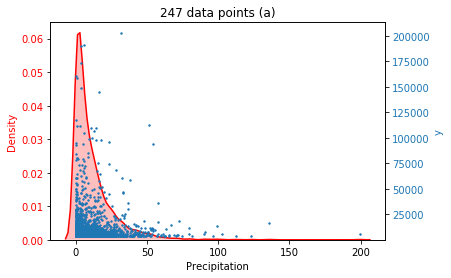

In [57]:
x = np.array(X[['prec']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (a)')
ax1.set_xlabel('Precipitation')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

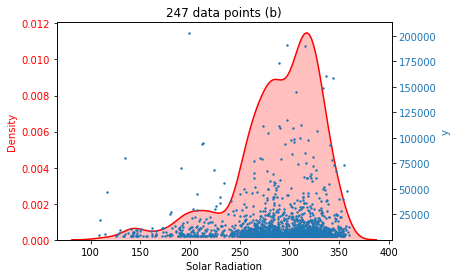

In [58]:
#Solar Radiation
x = np.array(X[['solar']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (b)')
ax1.set_xlabel('Solar Radiation')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

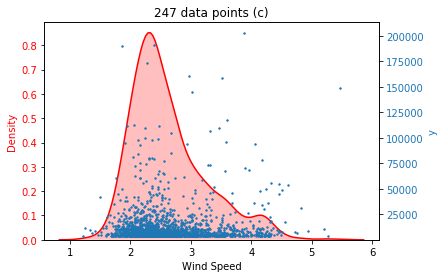

In [59]:
#Wind Speed
x = np.array(X[['wind']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (c)')
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

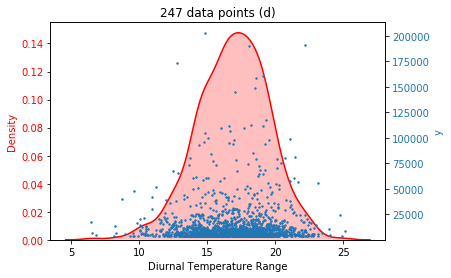

In [60]:
#Temperature Difference
x = np.array(X[['deltaT']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (d)')
ax1.set_xlabel('Diurnal Temperature Range')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

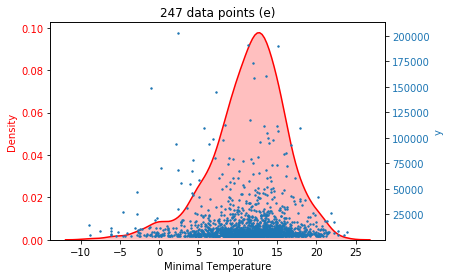

In [61]:
#Temperature min
x = np.array(X[['tmin']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (e)')
ax1.set_xlabel('Minimal Temperature')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

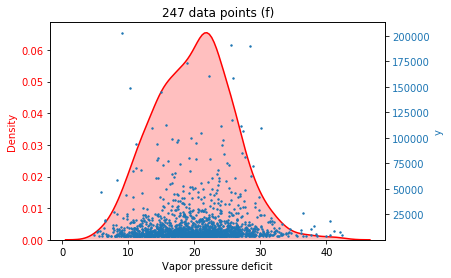

In [62]:
#VPD
x = np.array(X[['vpd']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (f)')
ax1.set_xlabel('Vapor pressure deficit')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

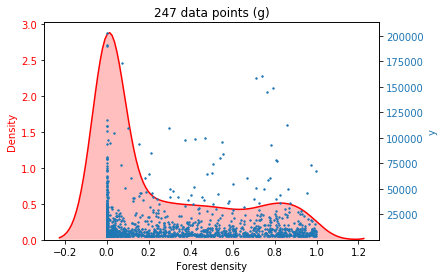

In [63]:
#forest
x = np.array(X[['forest']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (g)')
ax1.set_xlabel('Forest density')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

(20, 213057.85407715905)

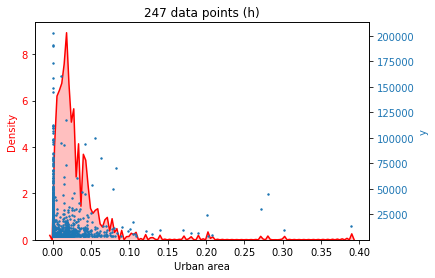

In [64]:
#urban
x = np.array(X[['urban']]).reshape(-1)
fig, ax1 = plt.subplots()
ax1 = sns.kdeplot(x, shade=True, color="r")
ax2 = ax1.twinx()
ax2.scatter(x, y, s=2)
ax1.set_title('247 data points (h)')
ax1.set_xlabel('Urban area')
ax1.set_ylabel('Density', color="r")
ax1.tick_params(axis='y', labelcolor="r")
ax2.set_ylabel('y', color='C0')
ax2.tick_params(axis='y', labelcolor="C0")
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=20)

## 3 - Visualizing the data

### Initialize Dataset

Here we load the dataset from the zarr store. Note that this very large dataset initializes nearly instantly, and we can see the full list of variables and coordinates.

In [ ]:
ds = xr.open_dataset('../data_wildfire/burnarea.nc')
df = ds.to_dataframe()
df

In [ ]:
ds['burnarea'] = ds['burnarea'].sel(severity=1).drop('severity')

In [ ]:
del ds['severity']
ds

In [ ]:
ds = ds.sum('severity')

In [ ]:
ds.burnarea[10]

#### Global Overview of burned areas at time = 345

In [ ]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ds.burnarea.isel(time=345).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.show()

#### Total Burned Area vs. Space

In [ ]:
burn_std = ds.burnarea.sum(dim='time').load()
burn_std.name = 'Total Burned Area'

In [ ]:
plt.figure(figsize=(15,10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.NearsidePerspective(central_latitude=40, central_longitude=-110))
burn_std.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='OrRd')

ax.coastlines()
ax.set_extent([-130,-80,25,60])
_ = plt.title('Fires Intensity from 1984 to 2016')

#### Total Burned Area vs. Time

In [ ]:
# the computationally intensive step
burn_timeseries = ds.burnarea.sum(dim=('lat', 'lon')).load()

In [ ]:
burn_timeseries.plot(label='full data')
burn_timeseries.rolling(time=12, center=True).mean().plot(label='rolling annual mean')
#plt.rcParams['figure.figsize'] = [35, 25]
plt.ylabel('Burnarea')
plt.title('Total Wildfire area on the West Coast')
plt.legend()
plt.grid()

#### Holomap

In [ ]:
import numpy as np
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs as ccrs
dataset = hv.Dataset(ds.burnarea)
hv_im = (dataset.to(hv.Image, ['lon', 'lat'], dynamic=True)
                .redim.range(burnarea=(0.5, 35.))
                .options(cmap='OrRd', width=800, height=450, colorbar=True))

%output holomap='scrubber' fps=2
regrid(hv_im, precompute=True) * gf.coastline